# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
city_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
city_ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
driver_sum = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_sum.head()




type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fare_sum = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_sum.head()





type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_perride = total_fare_sum / city_ride_count
avg_fare_perride.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_perride = total_fare_sum / city_ride_count
avg_fare_perride.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame()
pyber_summary_df["Total Rides"] = city_ride_count
pyber_summary_df["Total Drivers"] = driver_sum
pyber_summary_df["Total Fares"] = total_fare_sum
pyber_summary_df["Average Fare per Ride"] = city_ride_count
pyber_summary_df["Average Fare per Driver"] = city_ride_count
pyber_summary_df.head()









,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,125,125
Suburban,625,490,19356.33,625,625
Urban,1625,2405,39854.38,1625,1625


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df["Total Rides"] = city_ride_count
pyber_summary_df["Total Drivers"] = driver_sum
pyber_summary_df["Total Fares"] = total_fare_sum
pyber_summary_df["Average Fare per Ride"] = city_ride_count
pyber_summary_df["Average Fare per Driver"] = city_ride_count
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,125,125
Suburban,625,490,19356.33,625,625
Urban,1625,2405,39854.38,1625,1625


In [25]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df.head(10)

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$125.00,$125.00
Suburban,625,490,"$19,356.33",$625.00,$625.00
Urban,"1,625","2,405","$39,854.38",$1625.00,$1625.00


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# Display the data table for preview
pyber_data_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban
5,South Latoya,3/11/2019 12:26,9.52,2.000000e+12,10,Urban
6,New Paulville,2/27/2019 11:17,43.25,7.930000e+11,44,Urban
7,Simpsonburgh,4/26/2019 0:43,35.98,1.120000e+11,21,Urban
8,South Karenland,1/8/2019 3:28,35.09,8.000000e+12,4,Urban
9,North Jasmine,3/9/2019 6:26,42.81,5.330000e+12,33,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_sum = pyber_data_df.groupby(['type','date']).sum()[["fare"]]
total_fare_sum

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26
...                      ...
Urban 5/8/2019 1:54    32.69
      5/8/2019 2:31    41.33
      5/8/2019 4:20    21.99
      5/8/2019 4:39    18.45
      5/8/2019 7:29    18.55

[2364 rows x 1 columns]

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()


sum_fares_df = total_fare_sum.reset_index()
sum_fares_df.head(10)

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
5,Rural,1/18/2019 0:46,15.12
6,Rural,1/18/2019 7:36,43.57
7,Rural,1/19/2019 11:40,49.44
8,Rural,1/19/2019 12:38,38.68
9,Rural,1/19/2019 20:21,56.78


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_fares_pvt = sum_fares_df.pivot(index='date', columns='type', values='fare')
sum_fares_pvt.head()

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31


In [15]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
sum_fares_pvt.index=pd.to_datetime(sum_fares_pvt.index)

In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
sum_fares_df = sum_fares_pvt.loc['2019-01-01':'4-29-2019']
sum_fares_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
2019-01-01 14:52:00,NaN,31.15,NaN
2019-01-01 17:22:00,NaN,NaN,42.11
2019-01-01 21:04:00,NaN,NaN,11.71
2019-01-01 02:07:00,NaN,24.07,NaN


In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
sum_fares_df.info("index")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_fares_week_df = sum_fares_df.resample("W").sum()
sum_fares_week_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



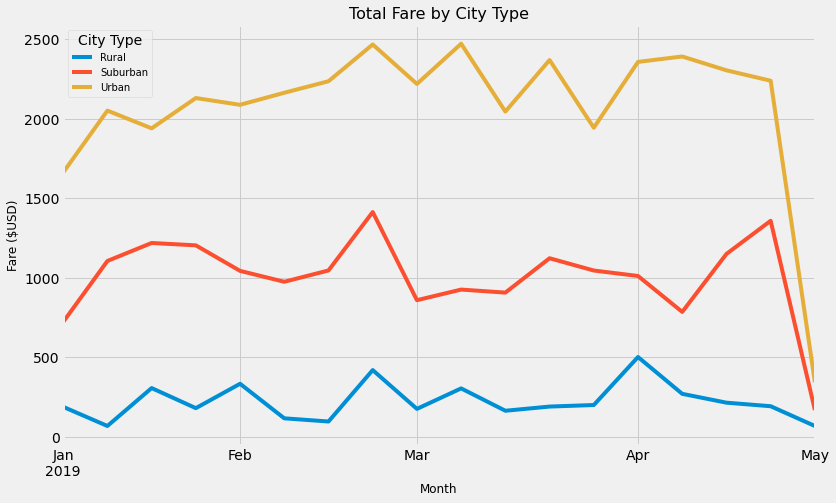

In [23]:
plt.style.use('fivethirtyeight')
sum_fares_week_df.plot(figsize=(12,8))
plt.gcf().subplots_adjust(bottom=0.15)
plt.title("Total Fare by City Type", fontsize=16)
plt.ylabel("Fare ($USD)", fontsize=12)
plt.xlabel("Month", fontsize=12)
gnd = plt.legend(fontsize="10", loc="best", title="City Type")

plt.savefig("Analysis/Fig8.png")
plt.show()

